<a href="https://colab.research.google.com/github/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


#DataSet

In [93]:
!git clone https://github.com/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material.git

fatal: destination path 'Fault-Tolerant-Control-Systems-TA-Class-Material' already exists and is not an empty directory.


In [94]:
data_train_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  train (20x960x52).xlsx",header=None,  names=['','','','','xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'])
data_test_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  test  (20x960x52).xlsx")
data_train_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 train (480x52).xlsx")
data_test_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 test (960x52).xlsx")

In [95]:
X_train_fault = data_train_fault.iloc[:,4:]
X_test_fault = data_test_fault.iloc[:,4:]

y_train_fault = data_train_fault.iloc[:,1]
y_test_fault = data_test_fault.iloc[:,1]

X_train_normal = data_train_normal.iloc[:,4:]
X_test_normal = data_test_normal.iloc[:,4:]

y_train_normal = data_train_normal.iloc[:,1]
y_test_normal = data_test_normal.iloc[:,1]

In [96]:
data_train = [X_train_fault, X_train_normal]
label_train = [y_train_fault, y_train_normal]
X_train = pd.concat(data_train)
y_train = pd.concat(label_train)

In [97]:
data_test = [X_test_fault, X_test_normal]
label_test = [y_test_fault, y_test_normal]
X_test = pd.concat(data_test)
y_test = pd.concat(label_test)

In [98]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [99]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Confusion Matrix


In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Multi-Layer Perceptrons (MLP)

In [43]:
#Splitting the dataset into  training and validation sets
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, test_size = 0.25)

In [45]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,),activation="relu",random_state=1, verbose=2,max_iter=20).fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(clf.score(X_test, y_test))

In [ ]:
clf.predict_proba(X_test)

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred)
print(cm_mlp)

In [ ]:
print("Accuracy of MLPClassifier : ''", accuracy(cm_mlp))

Confusion matrix, without normalization


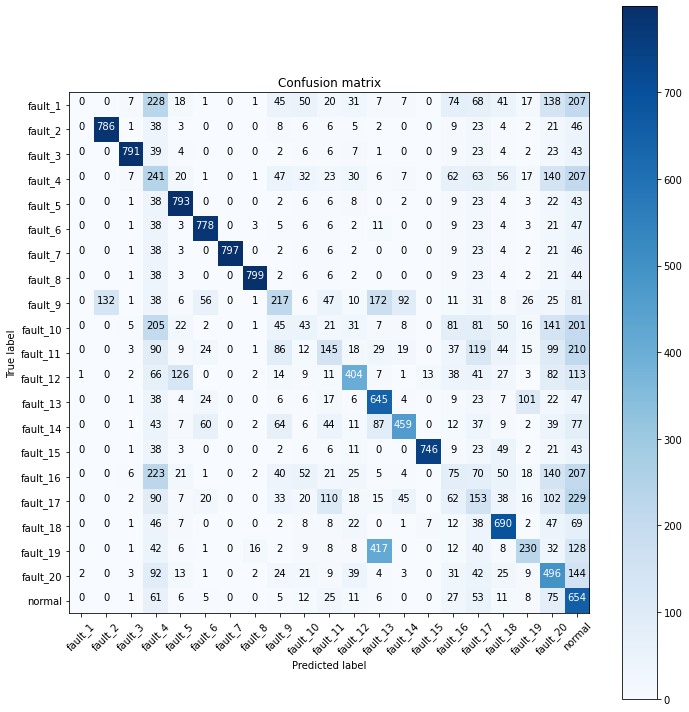

In [74]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_mlp, ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [102]:
# Imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# Configuration options
num_classes = 21

# Convert target classes to categorical ones
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# Set the input shape
input_shape = (52,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(512, input_shape=input_shape, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1, batch_size=16, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Feature shape: (52,)
524/524 [==============================] - 3s 5ms/step - loss: 1.4225 - accuracy: 0.5380 - val_loss: 15.4012 - val_accuracy: 0.0458
630/630 - 1s - loss: 5.6297 - accuracy: 0.4244 - 1s/epoch - 2ms/step
Test results - Loss: 5.62970495223999 - Accuracy: 0.4244047701358795%


In [ ]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))
 
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)
 
# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'file.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))